Importing the Library

In [43]:
import pandas as pd 
import statsmodels.api as sm
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats

Setting the data

In [44]:
df_sample=pd.DataFrame({"Before":np.random.normal(loc=40,scale=10,size=17),"After":np.random.normal(loc=30,scale=10,size=17)})
print(df_sample.head())

      Before      After
0  39.724968  36.413139
1  40.127884  15.209505
2  45.249968  35.438563
3  50.412187  16.524947
4  55.197384  33.498166


<h4>Problem Statement</h4><br>
Suppose a gym introduces its newly launch weight loss program.The gym concludes that the people were benefitted from thier weight loss program
<h5>Hypothesis Testing</h5><br>
Null Hypothesis(H<sub>0</sub>)=There is no significant difference between the means of the paired difference i.e. mean_difference<=0<br>
Alternative Hypothesis(H<sub>a</sub>)=There is significant difference between the means of the paired difference i.e. mean_difference>0<br>
Checking the assumption of our data 

0     3.311829
1    24.918379
2     9.811406
3    33.887240
4    21.699219
dtype: float64


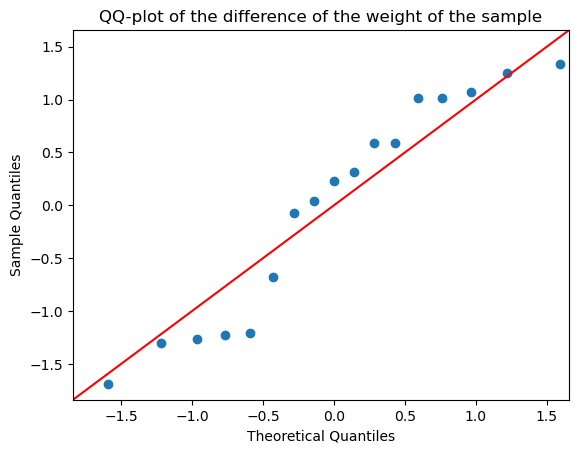

ShapiroResult(statistic=0.9023906242970965, pvalue=0.07448380767139047)


In [45]:
paired_difference=df_sample["Before"]-df_sample["After"]
print(paired_difference.head())
##Checking the normality of the paired difference using qq-plot
fig=sm.qqplot(paired_difference,line='45',fit=True)
plt.title("QQ-plot of the difference of the weight of the sample")
plt.show()
#Checking the normality using Shapiro-Wilk test
shapiro_data=stats.shapiro(paired_difference)
print(shapiro_data)


As the qusn specify the condition of the before and after case and same batch of the people were selected while drawing the sample we use paired_two_sample_t_test

In [46]:
t_statistics=paired_difference.mean()/(paired_difference.std()/np.sqrt(17))
p_value=(stats.t.cdf(-abs(t_statistics),16))
print(t_statistics,p_value)
#OR
# Perform a paired t-test
t_stat, p_value = stats.ttest_rel(df_sample["Before"],df_sample["After"])

print(f"T-statistic: {t_stat}, P-value: {p_value/2}")

6.01514021171468 8.999957844360227e-06
T-statistic: 6.01514021171468, P-value: 8.999957844360227e-06


Decision:

In [47]:
alpha=5/100
if p_value>alpha:
    null_hypothesis=True
    print("Accept Null Hypothesis and reject Alternative Hypothesis")
else:
    null_hypothesis=False
    print("Reject Null hypothesis and accept Alternative Hypothesis")

Reject Null hypothesis and accept Alternative Hypothesis


Conclusion:

In [48]:
if(null_hypothesis==True):
    print("There is no significant impact of the weight loss program")
else:
    print("There is significant impact of the weight loss program")

There is significant impact of the weight loss program
